In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# [PyTorch](https://pytorch.org/)
## What is PyTorch?
### PyTorch is a Python-based scientific computing package serving two broad purposes:

- A replacement for NumPy to use the power of GPUs and other accelerators.
- An automatic differentiation library that is useful to implement neural networks.

## Official documentation: https://pytorch.org/docs/stable/index.html
## Offical 60 mins tutorial: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

<font color='red'>IMPORTANT: All the materials taken from [PyTorch](https://pytorch.org/)</font>


# TENSORS

In [21]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import gzip

import time
from typing import Union, Tuple, Dict, List, Any


# Tensor Initialization
Tensors can be initialized in various ways. Take a look at the following examples:

## Directly from data

Tensors can be created directly from data. The data type is automatically inferred.

In [22]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


From a NumPy array

Tensors can be created from NumPy arrays (and vice versa - see [Bridge with NumPy](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label))

In [23]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

## From another tensor:

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [24]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print("Ones Tensor: \n {} \n" .format(x_ones))

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print("Random Tensor: \n {} \n" .format(x_rand))

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6135, 0.5803],
        [0.1254, 0.6694]]) 



## With random or constant values:

shape is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [25]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print("Random Tensor: \n {} \n" .format(rand_tensor))
print("Ones Tensor: \n {} \n" .format(ones_tensor))
print("Zeros Tensor: \n {}" .format(zeros_tensor))

Random Tensor: 
 tensor([[0.1046, 0.0205, 0.8630],
        [0.3376, 0.8951, 0.7933]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor Attributes
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [26]:
tensor = torch.rand(3, 4)

print("Shape of tensor: {}" .format(tensor.shape))
print("Datatype of tensor: {}" .format(tensor.dtype))
print("Device tensor is stored on: {}" .format(tensor.device))


Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor Operations
Over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, and more are comprehensively described [here](https://pytorch.org/docs/stable/torch.html).

Each of them can be run on the GPU (at typically higher speeds than on a CPU). If you’re using Colab, allocate a GPU by going to Edit > Notebook Settings.



In [27]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print("Device tensor is stored on: {}" .format(tensor.device))


Device tensor is stored on: cpu


/home/biswajit/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Try out some of the operations from the list. If you’re familiar with the NumPy API, you’ll find the Tensor API a breeze to use.

## Standard numpy-like indexing and slicing:



In [28]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


 Joining tensors You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining op that is subtly different from torch.cat.

In [29]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


## Multiplying tensors



In [30]:
# This computes the element-wise product
print("tensor.mul(tensor) \n {} \n" .format(tensor.mul(tensor)))
# Alternative syntax:
print("tensor * tensor \n {}" .format(tensor * tensor))

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## This computes the matrix multiplication between two tensors



In [31]:
print("tensor.matmul(tensor.T) \n {} \n" .format(tensor.matmul(tensor.T)))
# Alternative syntax:
print("tensor @ tensor.T \n {}" .format(tensor @ tensor.T))

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


## In-place operations Operations that have a _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.

In [32]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


<font color='red'>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged. </font>



## Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

## Tensor to NumPy array

In [33]:
t = torch.ones(5)
print("t: {}" .format(t))
n = t.numpy()
print("n: {}" .format(n))

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


## A change in the tensor reflects in the NumPy array.



In [34]:
t.add_(1)
print("t: {}" .format(t))
print("n: {}" .format(n))

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


## NumPy array to Tensor


In [35]:
n = np.ones(5)
t = torch.from_numpy(n)

## Changes in the NumPy array reflects in the tensor.



In [36]:
np.add(n, 1, out=n)
print("t: {}" .format(t))
print("n: {}" .format(n))

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Differentiation in Autograd
Let’s take a look at how autograd collects gradients. We create two tensors a and b with requires_grad=True. This signals to autograd that every operation on them should be tracked.



In [37]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We create another tensor Q from a and b.

$Q = 3a^3 - b^2$


In [38]:
Q = 3*a**3 - b**2


Let’s assume a and b to be parameters of an NN, and Q to be the error. In NN training, we want gradients of the error w.r.t. parameters, i.e.

$\frac{\partial Q}{\partial a} = 9a^2$

$\frac{\partial Q}{\partial b} = -2b$

When we call .backward() on Q, autograd calculates these gradients and stores them in the respective tensors’ .grad attribute.

We need to explicitly pass a gradient argument in Q.backward() because it is a vector. gradient is a tensor of the same shape as Q, and it represents the gradient of Q w.r.t. itself, i.e.

$\frac{dQ}{dQ} = 1$

Equivalently, we can also aggregate Q into a scalar and call backward implicitly, like Q.sum().backward().

In [39]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

## Gradients are now deposited in a.grad and b.grad

In [40]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


# A simple two layer network using <font color='red'>numpy</font> with gradient descent update rule

In [41]:
dims_data = 100
num_data_points = 1000
num_neurons_1st_layer = 70
num_neurons_output_layer = 10

num_iteration = 100
learning_rate = 1e-4

# Create a random dataset
X = np.random.randn(num_data_points, dims_data)
Y = np.random.randn(num_data_points, num_neurons_output_layer)

# Initialize weight parameters randomly
W1 = np.random.randn(dims_data, num_neurons_1st_layer)
B1 = np.random.randn(num_neurons_1st_layer)
W2 = np.random.randn(num_neurons_1st_layer, num_neurons_output_layer)
B2 = np.random.randn(num_neurons_output_layer)

def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + np.exp(-x))

loss = np.zeros(num_iteration)

tic = time.time()

for itr in tqdm(range(num_iteration)):
    f_1 = act_func_sigmoid(X.dot(W1) + B1)
    Y_bar = f_1.dot(W2) + B2
    loss[itr] = np.square(Y_bar - Y).sum()/X.shape[0]

    del_loss_by_del_Y_bar = 2*(Y_bar - Y)
    del_loss_by_del_W2 = f_1.T.dot(del_loss_by_del_Y_bar)
    del_loss_by_del_B2 = np.sum(1.0*del_loss_by_del_Y_bar, axis=0)
    del_loss_by_del_W1 = X.T.dot(del_loss_by_del_Y_bar.dot(W2.T) * f_1 * (1 - f_1))
    del_loss_by_del_B1 = np.sum(del_loss_by_del_Y_bar.dot(W2.T) * f_1 * (1 - f_1), axis=0)

    W1 -= learning_rate * del_loss_by_del_W1
    B1 -= learning_rate * del_loss_by_del_B1
    W2 -= learning_rate * del_loss_by_del_W2
    B2 -= learning_rate * del_loss_by_del_B2

toc = time.time()
tot_exe_torch_gpu = toc - tic
print('Time taken: {} and final loss: {}' .format(tot_exe_torch_gpu, loss[-1]))



100%|██████████| 100/100 [00:00<00:00, 235.81it/s]

Time taken: 0.45501279830932617 and final loss: 13.513982399311463


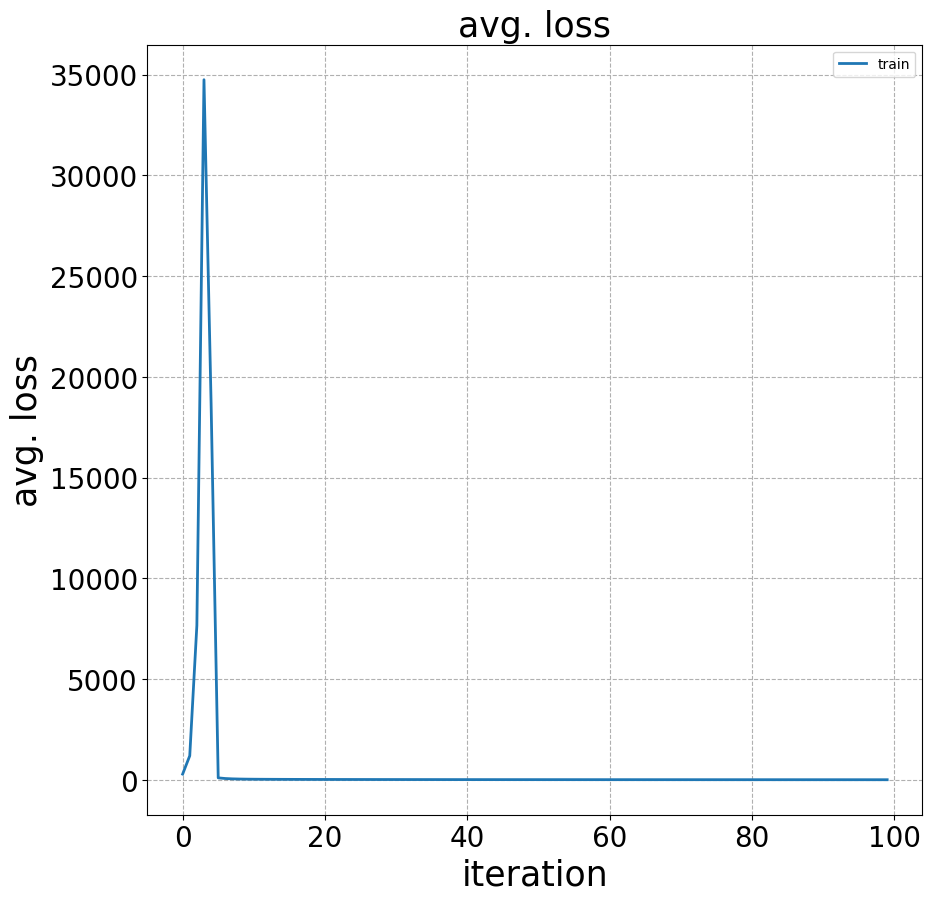

In [42]:
def plot_losses(
    losses: List[np.array],
    labels: List[str] = [],
    title: str = 'avg. loss',
    xlabel_: str = 'epoch',
    ylabel_: str = 'avg. loss',
    image_save_filename: str = 'avg_loss',
    figure_size: Tuple[int, int] = (10, 10),
    markers: List[str] = [],
    markersize: int = 10,
    linewidth: int = 2,
    linestyle: str = '-',
    title_fontsize: int = 25,
    xyticks_fontsize: int = 20,
    pos_legend: str = 'upper left',
    bbox_to_anchor: Tuple[float, float] = (1, 1),
) -> None:
    """Plot losses"""

    if len(labels) == 0:
        labels = list(range(1, len(losses)+1))
    if len(markers) == 0:
        markers = [None]*len(losses)
    plt.rcParams["figure.figsize"] = figure_size
    for i, Y in enumerate(losses):
        X = range(len(Y))
        plt.plot(
            X, Y,
            marker=markers[i],
            markersize=markersize,
            linewidth=linewidth,
            linestyle=linestyle,
            label=labels[i],
        )
    plt.xticks(fontsize=xyticks_fontsize)
    plt.yticks(fontsize=xyticks_fontsize)
    plt.xlabel(xlabel_, fontsize=title_fontsize)
    plt.ylabel(ylabel_, fontsize=title_fontsize)
    plt.grid(linestyle='--')
    plt.legend(loc=pos_legend, bbox_to_anchor=bbox_to_anchor)
    plt.title(title, fontsize=title_fontsize)

#      # save the plot
#     plt.savefig(
#         '' .join([image_save_filename,'.png']),
#         bbox_inches='tight'
#     )#save the plot in png form
    plt.show(block=False)
    plt.close()

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')

# Now let's try with <font color='red'>pytorch (CPU only) autograd tools</font> (A simple two layer network using pytorch) with gradient descent update rule

100%|██████████| 100/100 [00:00<00:00, 844.90it/s]


Time taken: 0.12012147903442383 and final loss: 13.148619651794434


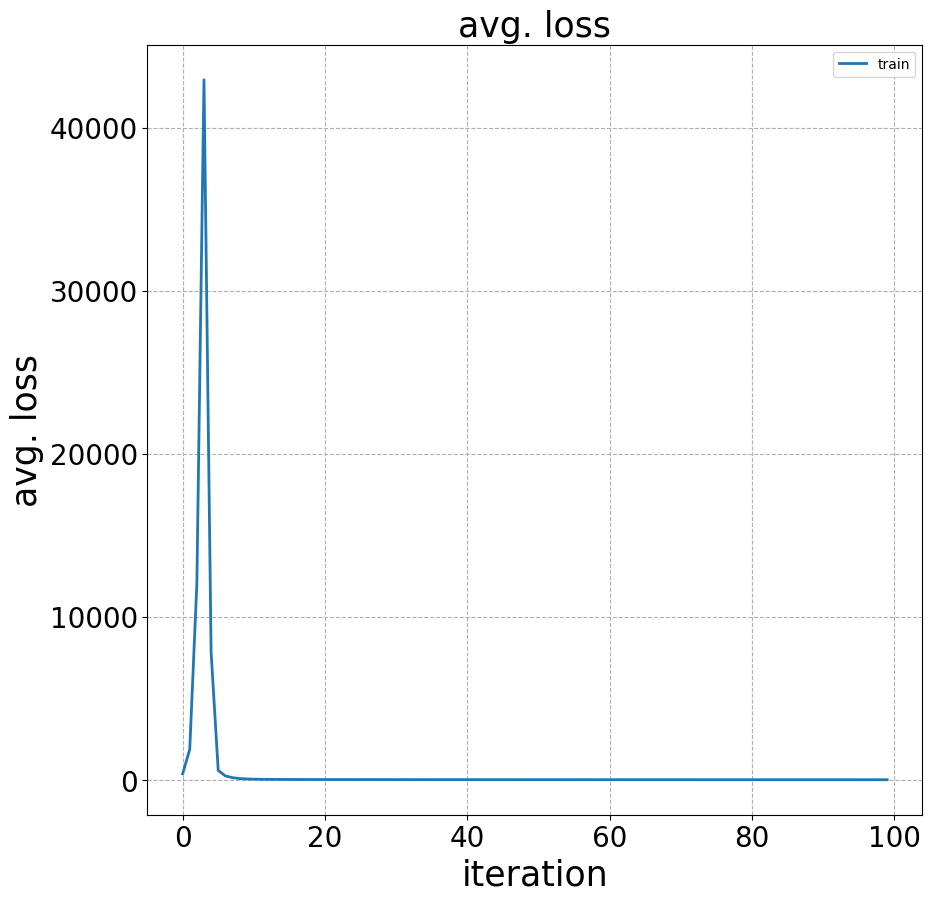

In [43]:
# Create a random dataset
X_torch = torch.randn(num_data_points, dims_data, requires_grad=False)
Y_torch = torch.randn(num_data_points, num_neurons_output_layer, requires_grad=False)

# Initialize weight parameters randomly
W1 = torch.randn(dims_data, num_neurons_1st_layer, requires_grad=True)
B1 = torch.randn(num_neurons_1st_layer, requires_grad=True)
W2 = torch.randn(num_neurons_1st_layer, num_neurons_output_layer, requires_grad=True)
B2 = torch.randn(num_neurons_output_layer, requires_grad=True)


def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + torch.exp(-x))

loss = np.zeros(num_iteration)

tic = time.time()
for itr in tqdm(range(num_iteration)):

    f_1 = act_func_sigmoid(X_torch.matmul(W1) + B1)
    Y_bar = f_1.matmul(W2) + B2
    final_loss = ((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()
    loss[itr] = ((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()/X_torch.shape[0]

    final_loss.backward()


    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        B1 -= learning_rate * B1.grad
        W2 -= learning_rate * W2.grad
        B2 -= learning_rate * B2.grad

        W1.grad.zero_()
        B1.grad.zero_()
        W2.grad.zero_()
        B2.grad.zero_()

toc = time.time()
tot_exe_torch_cpu = toc - tic
print('Time taken: {} and final loss: {}' .format(tot_exe_torch_cpu, loss[-1]))

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')


# Now let's try with pytorch (<font color='red'>GPU</font> if available) autograd tools (A sinple two layer network using pytorch) with gradient descent update rule

In [45]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Hurrah you have GPU and you can save time!')
else:
    device = torch.device('cpu')


# Create a random dataset
X_torch = torch.randn(num_data_points, dims_data, requires_grad=False, device=device)
Y_torch = torch.randn(num_data_points, num_neurons_output_layer, requires_grad=False, device=device)

# Initialize weight parameters randomly
W1 = torch.randn(dims_data, num_neurons_1st_layer, requires_grad=True, device=device)
B1 = torch.randn(num_neurons_1st_layer, requires_grad=True, device=device)
W2 = torch.randn(num_neurons_1st_layer, num_neurons_output_layer, requires_grad=True, device=device)
B2 = torch.randn(num_neurons_output_layer, requires_grad=True, device=device)


def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + torch.exp(-x))

loss = np.zeros(num_iteration)

tic = time.time()
for itr in tqdm(range(num_iteration)):
    f_1 = act_func_sigmoid(X_torch.matmul(W1) + B1)
    Y_bar = f_1.matmul(W2) + B2
    final_loss = ((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()
    loss[itr] = ((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()/X_torch.shape[0]

    final_loss.backward()


    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        B1 -= learning_rate * B1.grad
        W2 -= learning_rate * W2.grad
        B2 -= learning_rate * B2.grad

        W1.grad.zero_()
        B1.grad.zero_()
        W2.grad.zero_()
        B2.grad.zero_()

toc = time.time()
tot_exe_torch_gpu = toc - tic
print('Time taken: {} and final loss: {}' .format(tot_exe_torch_gpu, loss[-1]))

print('Time taken: numpy: {}, tensor: {}, tensor_gpu: {}' .format(tot_exe_numpy, tot_exe_torch_cpu, tot_exe_torch_gpu))

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')



100%|██████████| 100/100 [00:00<00:00, 875.14it/s]

Time taken: 0.1160438060760498 and final loss: 13.37008285522461


NameError: name 'tot_exe_numpy' is not defined

# Now let's try with pytorch (GPU if available) autograd tools (A sinple two layer network using pytorch) with <font color='red'>stochastic</font> gradient descent update rule


100%|██████████| 1000/1000 [00:00<00:00, 1585.40it/s]


Time taken: 0.16760921478271484 and final loss: 10.283394813537598
Time taken: numpy: 0.21214604377746582, tensor: 0.16655993461608887, tensor_gpu(if available): 0.16760921478271484, tensor_gpu(if available) with SGD: 0.6330151557922363


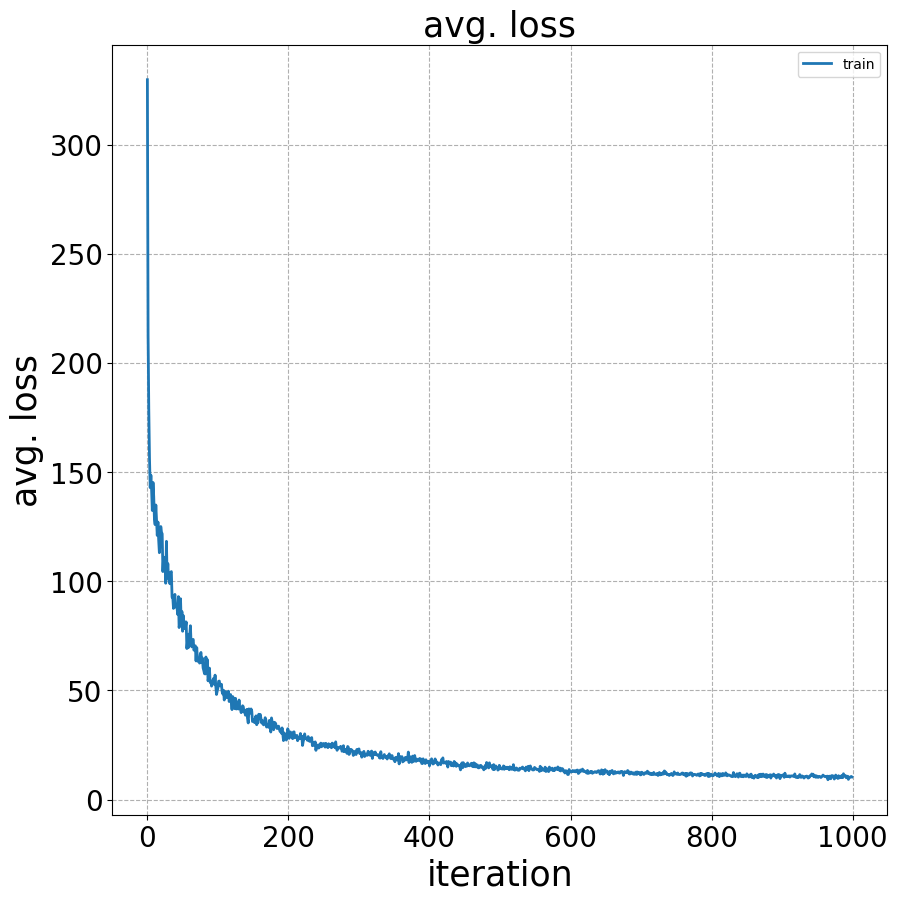

In [ ]:
batch_size = 100

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Hurrah you have GPU and you can save time!')
else:
    device = torch.device('cpu')


# Create a random dataset
X_torch = torch.randn(num_data_points, dims_data, requires_grad=False, device=device)
Y_torch = torch.randn(num_data_points, num_neurons_output_layer, requires_grad=False, device=device)

# Initialize weight parameters randomly
W1 = torch.randn(dims_data, num_neurons_1st_layer, requires_grad=True, device=device)
B1 = torch.randn(num_neurons_1st_layer, requires_grad=True, device=device)
W2 = torch.randn(num_neurons_1st_layer, num_neurons_output_layer, requires_grad=True, device=device)
B2 = torch.randn(num_neurons_output_layer, requires_grad=True, device=device)


def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + torch.exp(-x))

loss = np.zeros(10*num_iteration)

tic = time.time()
for itr in tqdm(range(10*num_iteration)):
    #take random samples
    ids_random_samples = np.random.choice(X_torch.shape[0], batch_size)
    X_torch_rand_sample = X_torch[ids_random_samples, :]
    Y_torch_rand_sample = Y_torch[ids_random_samples, :]
    #-------------------------------
    f_1 = act_func_sigmoid(X_torch_rand_sample.matmul(W1) + B1)#f_1 = act_func_sigmoid(X_torch.matmul(W1) + B1)
    Y_bar = f_1.matmul(W2) + B2
    final_loss = ((Y_bar - Y_torch_rand_sample)*(Y_bar - Y_torch_rand_sample)).sum()#((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()
    loss[itr] = ((Y_bar - Y_torch_rand_sample)*(Y_bar - Y_torch_rand_sample)).sum()/X_torch_rand_sample.shape[0]#((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()/X_torch.shape[0]

    final_loss.backward()


    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        B1 -= learning_rate * B1.grad
        W2 -= learning_rate * W2.grad
        B2 -= learning_rate * B2.grad

        W1.grad.zero_()
        B1.grad.zero_()
        W2.grad.zero_()
        B2.grad.zero_()

toc = time.time()
tot_exe_torch_gpu_sgd = toc - tic

# final loss based on all samples
f_1 = act_func_sigmoid(X_torch.matmul(W1) + B1)
Y_bar = f_1.matmul(W2) + B2
final_loss = ((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()
final_loss_sgd = ((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()/X_torch.shape[0]

print('Time taken: {} and final loss: {}' .format(tot_exe_torch_gpu, final_loss_sgd))
print('Time taken: numpy: {}, tensor: {}, tensor_gpu(if available): {}, tensor_gpu(if available) with SGD: {}' .format(tot_exe_numpy, tot_exe_torch_cpu, tot_exe_torch_gpu, tot_exe_torch_gpu_sgd))

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')



# Now let's try with pytorch (GPU if available) autograd tools (A sinple two layer network using pytorch) with <font color='red'>stochastic (version-2: over all samples in each iteration)</font> gradient descent update rule


100%|██████████| 100/100 [00:00<00:00, 171.11it/s]


Time taken: 0.16760921478271484 and final loss: 10.328369140625
Time taken: numpy: 0.21214604377746582, tensor: 0.16655993461608887, tensor_gpu(if available): 0.16760921478271484, tensor_gpu(if available) with SGD: 0.5868339538574219


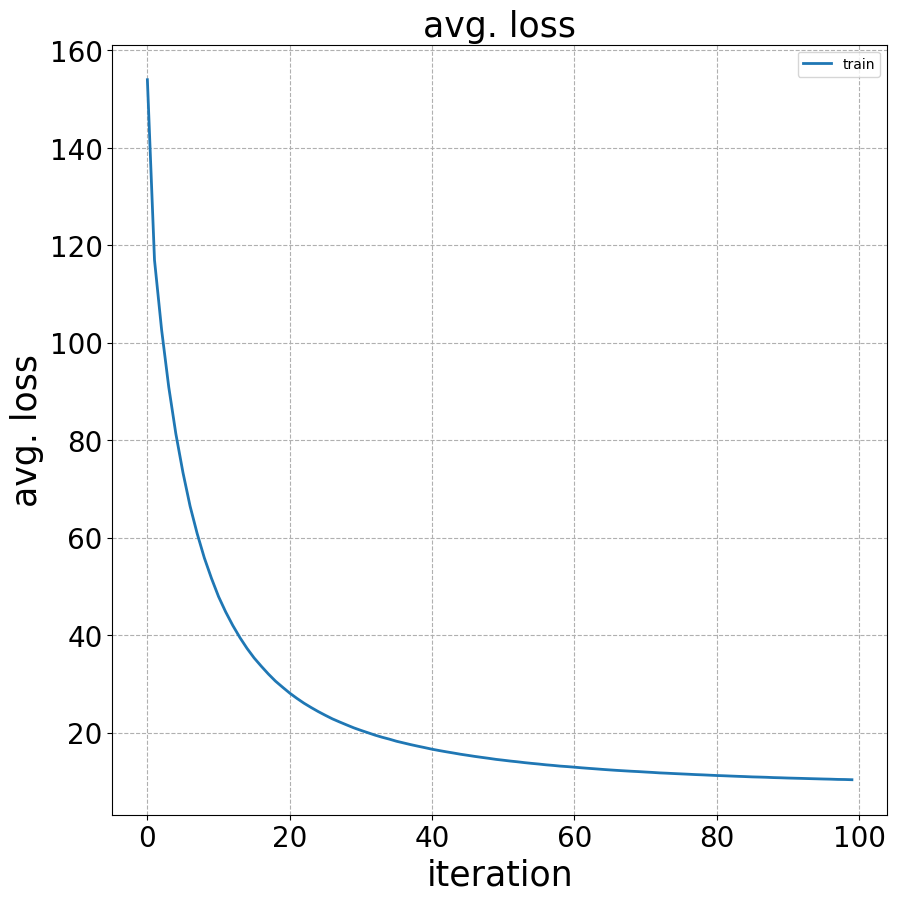

In [ ]:
batch_size = 100

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Hurrah you have GPU and you can save time!')
else:
    device = torch.device('cpu')


# Create a random dataset
X_torch = torch.randn(num_data_points, dims_data, requires_grad=False, device=device)
Y_torch = torch.randn(num_data_points, num_neurons_output_layer, requires_grad=False, device=device)

# Initialize weight parameters randomly
W1 = torch.randn(dims_data, num_neurons_1st_layer, requires_grad=True, device=device)
B1 = torch.randn(num_neurons_1st_layer, requires_grad=True, device=device)
W2 = torch.randn(num_neurons_1st_layer, num_neurons_output_layer, requires_grad=True, device=device)
B2 = torch.randn(num_neurons_output_layer, requires_grad=True, device=device)


def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + torch.exp(-x))

loss = np.zeros(num_iteration)

tic = time.time()
for itr in tqdm(range(num_iteration)):

    # data shuffle and minibatch settings
    num_train_samples = X_torch.shape[0]
    idx = np.random.permutation(num_train_samples)
    num_batches = int(np.ceil(float(num_train_samples)/batch_size))
    loss_batch = 0# loss accumulation


    for i in range(num_batches):# iteration over each minibatch

        start_idx = (i*batch_size)%num_train_samples
        X_torch_rand_sample = X_torch[idx[start_idx:start_idx+batch_size], :]
        Y_torch_rand_sample = Y_torch[idx[start_idx:start_idx+batch_size], :]
        #-------------------------------
        f_1 = act_func_sigmoid(X_torch_rand_sample.matmul(W1) + B1)#f_1 = act_func_sigmoid(X_torch.matmul(W1) + B1)
        Y_bar = f_1.matmul(W2) + B2
        final_loss = ((Y_bar - Y_torch_rand_sample)*(Y_bar - Y_torch_rand_sample)).sum()#((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()
        loss_batch += ((Y_bar - Y_torch_rand_sample)*(Y_bar - Y_torch_rand_sample)).sum()

        final_loss.backward()


        with torch.no_grad():
            W1 -= learning_rate * W1.grad
            B1 -= learning_rate * B1.grad
            W2 -= learning_rate * W2.grad
            B2 -= learning_rate * B2.grad

            W1.grad.zero_()
            B1.grad.zero_()
            W2.grad.zero_()
            B2.grad.zero_()
    loss[itr] = loss_batch/X_torch.shape[0]#((Y_bar - Y_torch)*(Y_bar - Y_torch)).sum()/X_torch.shape[0]


toc = time.time()
tot_exe_torch_gpu_sgd = toc - tic
print('Time taken: {} and final loss: {}' .format(tot_exe_torch_gpu, loss[-1]))
print('Time taken: numpy: {}, tensor: {}, tensor_gpu(if available): {}, tensor_gpu(if available) with SGD: {}' .format(tot_exe_numpy, tot_exe_torch_cpu, tot_exe_torch_gpu, tot_exe_torch_gpu_sgd))

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')



# Now let's try with real dataset (<font color='red'>CIFAR-10</font>) using <font color='red'>GD</font> update rule.


In [30]:
# Read real data
def read_cifar_10(filename):
    with open(filename, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_datapath = '/Users/soumitra/OneDrive/Documents/SS_PERSONAL/SS_TEACHING/RKMVERI/ML/2022/BDA/code/data/images/cifar-10-batches-py/'
filename = 'data_batch_1'
dict_cifar = read_cifar_10(cifar_datapath+filename)
print(dict_cifar.keys())
# though there are 50000 samples for train but for our experiment we will consider only 10000
X_train = np.array(dict_cifar[list(dict_cifar.keys())[2]]).astype(float)
Y_train = np.array(dict_cifar[list(dict_cifar.keys())[1]])
dict_cifar = read_cifar_10(cifar_datapath+'batches.meta')
Y_train_names = dict_cifar[list(dict_cifar.keys())[1]]
Y_train_names = [s.decode('utf-8') for s in Y_train_names]
print('#train samples: X-{} and Y-{}' .format(X_train.shape, Y_train.shape))

# read test data
filename = 'test_batch'
dict_cifar = read_cifar_10(cifar_datapath+filename)
print(dict_cifar.keys())
X_test = np.array(dict_cifar[list(dict_cifar.keys())[2]]).astype(float)
Y_test = np.array(dict_cifar[list(dict_cifar.keys())[1]])
print('#test samples: X-{} and Y-{}' .format(X_test.shape, Y_test.shape))

X_train /= 255.0
X_test /= 255.0





FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Mnistdata_batch_1'

# plot data freq. for each class

#images: 10000
Each image size: 32x32


/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


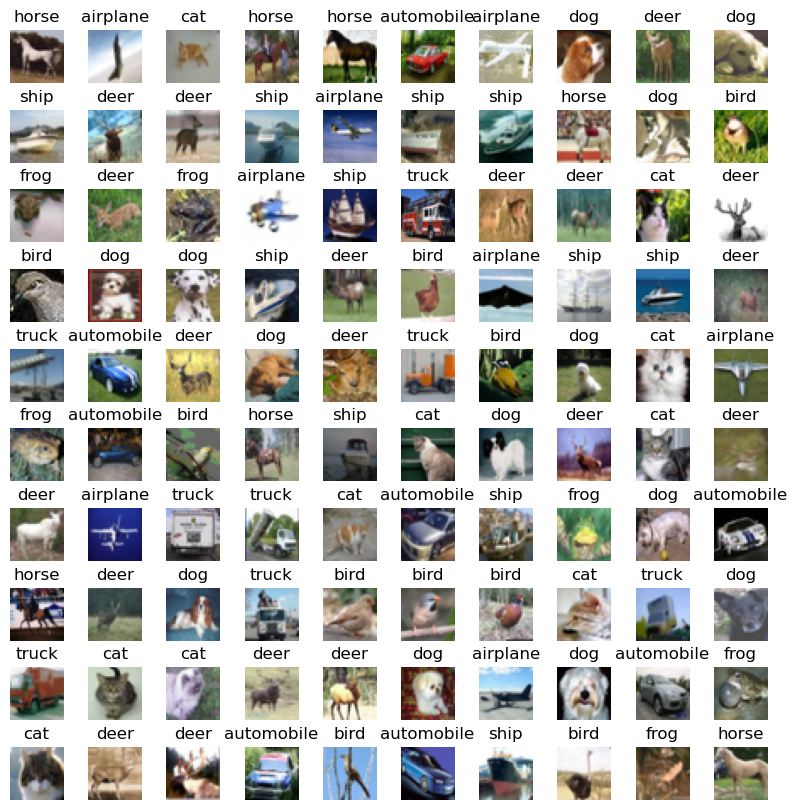

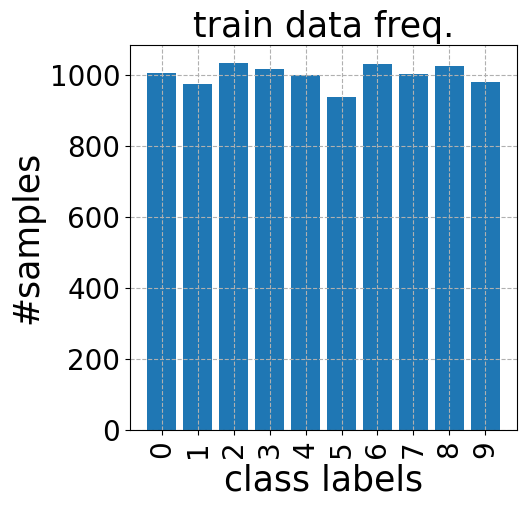

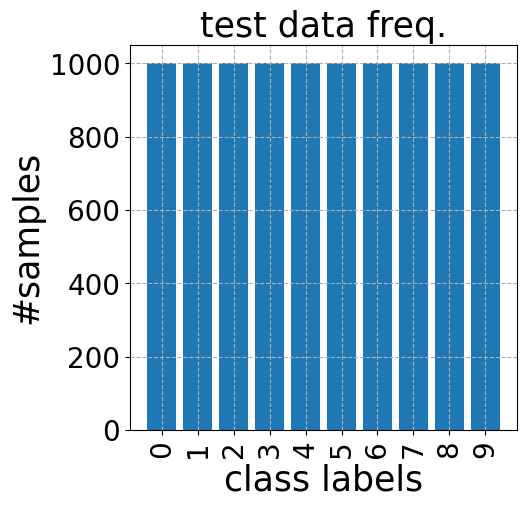

In [ ]:

def plot_bars(
    X: List[float],
    height: List[float],
    color: List[str] = [],
    labels: List[str] = [],
    title: str = 'Class label freq.',
    xlabel_: str = 'class labels',
    ylabel_: str = '#samples',
    image_save_filename: str = 'class label freq',
    figure_size: Tuple[int, int] = (5, 5),
    linewidth: int = 2,
    linestyle: str = '--',
    title_fontsize: int = 25,
    xyticks_fontsize: int = 20,
    pos_legend: str = 'upper left',
    bbox_to_anchor: Tuple[float, float] = (1, 1),
) -> None:
    """Plot bars"""

    if len(labels) == 0:
        labels = [str(i) for i in X]
    plt.rcParams["figure.figsize"] = figure_size

    plt.bar(X, height=height)

    plt.xticks(range(len(labels)), labels, fontsize=xyticks_fontsize, rotation=90)
    plt.yticks(fontsize=xyticks_fontsize)
    plt.xlabel(xlabel_, fontsize=title_fontsize)
    plt.ylabel(ylabel_, fontsize=title_fontsize)
    plt.grid(linestyle=linestyle)
    plt.title(title, fontsize=title_fontsize)

#      # save the plot
#     plt.savefig(
#         '' .join([image_save_filename,'.png']),
#         bbox_inches='tight'
#     )#save the plot in png form
    plt.show(block=False)
    plt.close()

def subplot_images(
    images: List[np.array],
    labels: List[str] = None,
    cmap='bone',
    size_grid: Tuple[int, int] = None,
    figsize: Tuple[int, int] = (10, 10),
    wspace: float = 0.1,
    hspace: float = -0.4

) -> None:
    """Plot images in a grid"""

    num_images = len(images)
    if size_grid is None:
        r = round(np.sqrt(num_images))
        c = np.ceil(float(num_images)/r)
        size_grid = (r, c)

    fig = plt.figure(figsize=figsize)
    for i in range(num_images):
        ax = fig.add_subplot(size_grid[0], size_grid[1], i+1)
        ax.imshow(images[i], cmap=cmap)
        if labels is not None:
            ax.set_title(labels[i])
        ax.axis('off')
        plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.show()


num_images = X_train.shape[0]
r_image = int(np.sqrt(X_train.shape[1]/3.0))
c_image = int(np.sqrt(X_train.shape[1]/3.0))
print('#images: {}\nEach image size: {}x{}' .format(num_images, r_image, c_image))

num_rand_samples = 100
ids_rand_samples = np.random.randint(0, num_images, num_rand_samples)
images = [np.moveaxis(X_train[i,:].reshape(3, r_image, c_image), 0, -1) for i in ids_rand_samples]
labels = [Y_train_names[Y_train[i]] for i in ids_rand_samples]
subplot_images(images, labels, hspace=0.5)


train_class_freq = np.histogram(Y_train, list(set(Y_train))+[10])
test_class_freq = np.histogram(Y_test, list(set(Y_test))+[10])

plot_bars(list(set(Y_train)), train_class_freq[0], title='train data freq.')
plot_bars(list(set(Y_test)), test_class_freq[0], title='test data freq.')


100%|██████████| 100/100 [06:26<00:00,  3.86s/it]

Time taken: 386.1292088031769 and final loss: 30.15264329802042


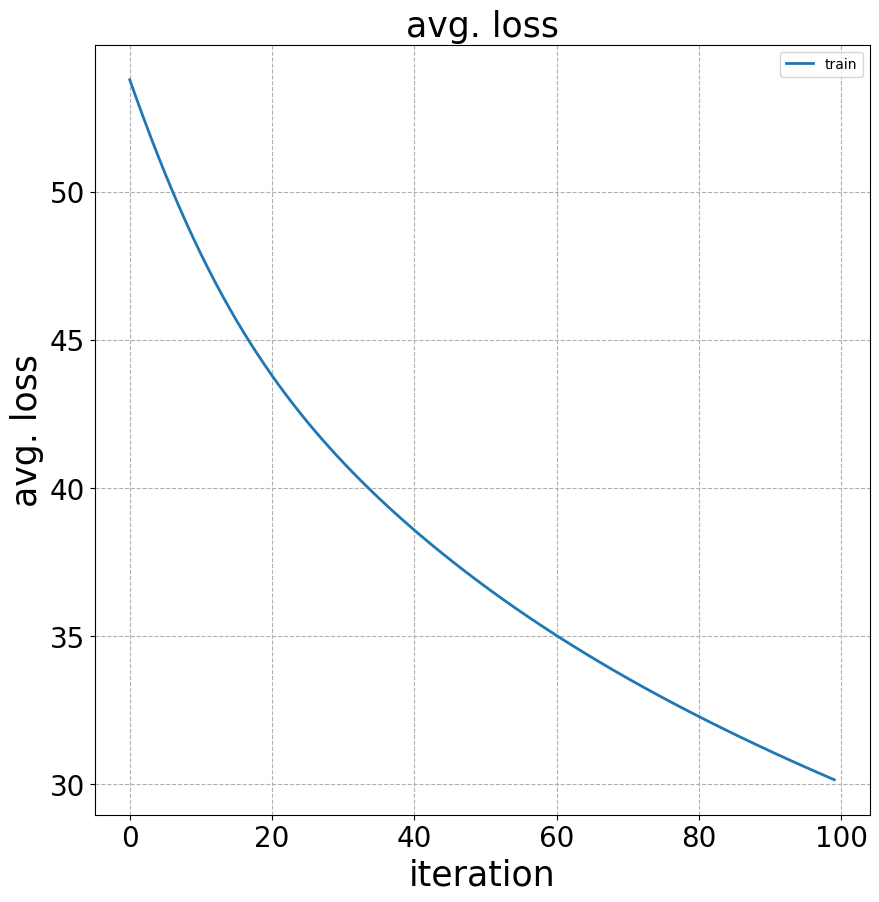

In [ ]:
dims_data = X_train.shape[1]
num_neurons_1st_layer = dims_data//2
num_neurons_output_layer = 10

num_iteration = 100
learning_rate = 1e-3

# Initialize weight parameters randomly
# Initialize weight parameters randomly
W1 = np.random.randn(dims_data, num_neurons_1st_layer)
B1 = np.random.randn(num_neurons_1st_layer)
W2 = np.random.randn(num_neurons_1st_layer, num_neurons_output_layer)
B2 = np.random.randn(num_neurons_output_layer)

def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + np.exp(-x))

loss = np.zeros(num_iteration)

tic = time.time()

for itr in tqdm(range(num_iteration)):

    f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
    scores = f_1.dot(W2) + B2

    scores -= np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(scores)
    prob_scores = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    temp_loss = -np.sum(np.log(prob_scores[(range(Y_train.shape[0]), Y_train)]))
    temp_loss /= Y_train.shape[0]


    loss[itr] = temp_loss

    prob_scores[(range(Y_train.shape[0]), Y_train)] -= 1# (M, C)
    del_loss_by_del_W2 = f_1.T.dot(prob_scores)/Y_train.shape[0]#(H, C)
    del_loss_by_del_B2 = np.sum(prob_scores, axis=0)/Y_train.shape[0] #(C)
    del_loss_by_del_W1 = X_train.T.dot(prob_scores.dot(W2.T) * f_1 * (1 - f_1))/Y_train.shape[0]#(D,H)
    del_loss_by_del_B1 = np.sum(prob_scores.dot(W2.T) * f_1 * (1 - f_1), axis=0)/Y_train.shape[0]

    W1 -= learning_rate * del_loss_by_del_W1
    B1 -= learning_rate * del_loss_by_del_B1
    W2 -= learning_rate * del_loss_by_del_W2
    B2 -= learning_rate * del_loss_by_del_B2

toc = time.time()
tot_exe_numpy = toc - tic
print('Time taken: {} and final loss: {}' .format(tot_exe_numpy, loss[-1]))

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')




In [ ]:
# calculate accuracy
f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
scores_train = f_1.dot(W2) + B2
Y_train_pred = np.argmax(scores_train, axis=1)
train_accuracy = np.mean(Y_train == Y_train_pred)

f_1 = act_func_sigmoid(X_test.dot(W1) + B1)
scores_test = f_1.dot(W2) + B2
Y_test_pred = np.argmax(scores_test, axis=1)
test_accuracy = np.mean(Y_test == Y_test_pred)
print('acc.: train-{} and test-{}' .format(train_accuracy, test_accuracy))

acc.: train-0.1058 and test-0.1052


# Now let's try with real dataset using <font color='red'>SGD</font> update rule.


100%|██████████| 5000/5000 [09:42<00:00,  8.58it/s]


Time taken: 582.7420330047607 and final loss: 9.5920060484034


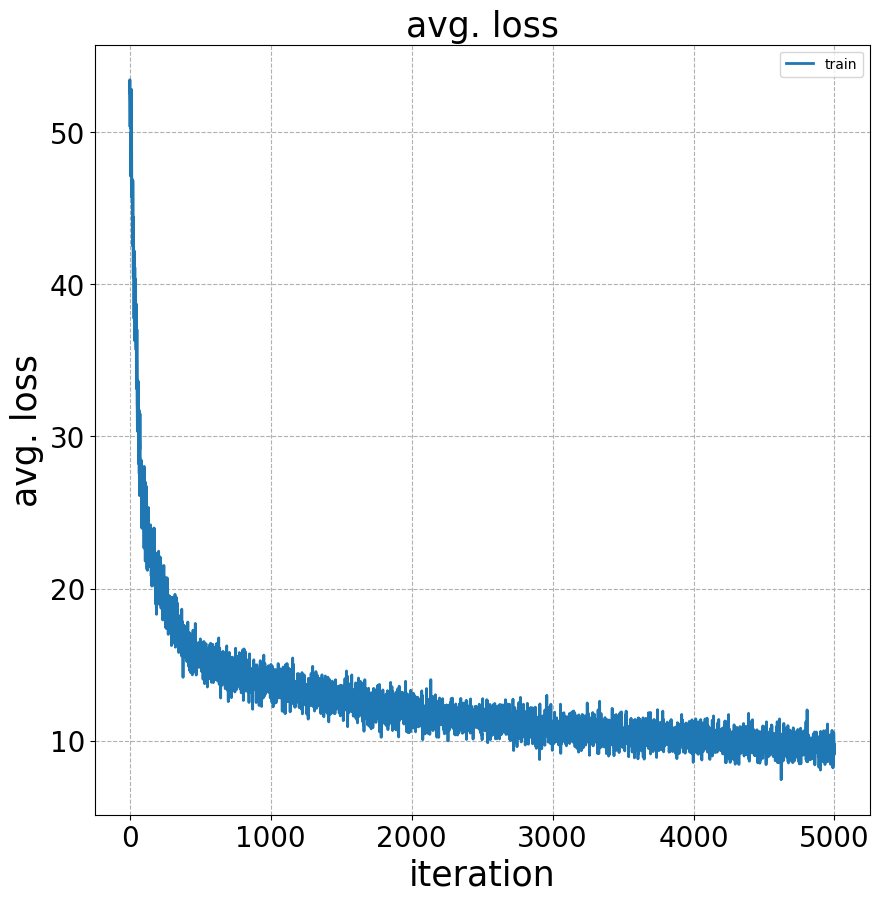

In [ ]:

dims_data = X_train.shape[1]
num_neurons_1st_layer = dims_data//2
num_neurons_output_layer = 10

num_iteration = 5000
learning_rate = 1e-3
batch_size = 256

# Initialize weight parameters randomly
# Initialize weight parameters randomly
W1 = np.random.randn(dims_data, num_neurons_1st_layer)
B1 = np.random.randn(num_neurons_1st_layer)
W2 = np.random.randn(num_neurons_1st_layer, num_neurons_output_layer)
B2 = np.random.randn(num_neurons_output_layer)

def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + np.exp(-x))

loss = np.zeros(num_iteration)

tic = time.time()

for itr in tqdm(range(num_iteration)):

    #take random samples
    ids_random_samples = np.random.choice(X_train.shape[0], batch_size)
    X_train_rand_sample = X_train[ids_random_samples, :]
    Y_train_rand_sample = Y_train[ids_random_samples]
    #-------------------------------

    f_1 = act_func_sigmoid(X_train_rand_sample.dot(W1) + B1)
    scores = f_1.dot(W2) + B2

    scores -= np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(scores)
    prob_scores = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    temp_loss = -np.sum(np.log(prob_scores[(range(Y_train_rand_sample.shape[0]), Y_train_rand_sample)]))
    temp_loss /= Y_train_rand_sample.shape[0]


    loss[itr] = temp_loss

    prob_scores[(range(Y_train_rand_sample.shape[0]), Y_train_rand_sample)] -= 1# (M, C)
    del_loss_by_del_W2 = f_1.T.dot(prob_scores)/Y_train_rand_sample.shape[0]#(H, C)
    del_loss_by_del_B2 = np.sum(prob_scores, axis=0)/Y_train_rand_sample.shape[0] #(C)
    del_loss_by_del_W1 = X_train_rand_sample.T.dot(prob_scores.dot(W2.T) * f_1 * (1 - f_1))/Y_train_rand_sample.shape[0]#(D,H)
    del_loss_by_del_B1 = np.sum(prob_scores.dot(W2.T) * f_1 * (1 - f_1), axis=0)/Y_train_rand_sample.shape[0]

    W1 -= learning_rate * del_loss_by_del_W1
    B1 -= learning_rate * del_loss_by_del_B1
    W2 -= learning_rate * del_loss_by_del_W2
    B2 -= learning_rate * del_loss_by_del_B2

toc = time.time()
tot_exe_numpy = toc - tic

# final loss based on all samples
f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
scores = f_1.dot(W2) + B2

scores -= np.max(scores, axis=1, keepdims=True)
exp_scores = np.exp(scores)
prob_scores = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
final_loss_sgd = -np.sum(np.log(prob_scores[(range(Y_train.shape[0]), Y_train)]))
final_loss_sgd /= Y_train.shape[0]
print('Time taken: {} and final loss: {}' .format(tot_exe_numpy, final_loss_sgd))

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')


In [ ]:
# calculate accuracy
f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
scores_train = f_1.dot(W2) + B2
Y_train_pred = np.argmax(scores_train, axis=1)
train_accuracy = np.mean(Y_train == Y_train_pred)

f_1 = act_func_sigmoid(X_test.dot(W1) + B1)
scores_test = f_1.dot(W2) + B2
Y_test_pred = np.argmax(scores_test, axis=1)
test_accuracy = np.mean(Y_test == Y_test_pred)
print('acc.: train-{} and test-{}' .format(train_accuracy, test_accuracy))

acc.: train-0.2237 and test-0.1932


# Now let's see how <font color='red'>data normalization</font> effect the soln

In [ ]:
# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_test -= mean_image


100%|██████████| 5000/5000 [09:36<00:00,  8.67it/s]


Time taken: 576.848171710968 and final loss: 16.087113049352002


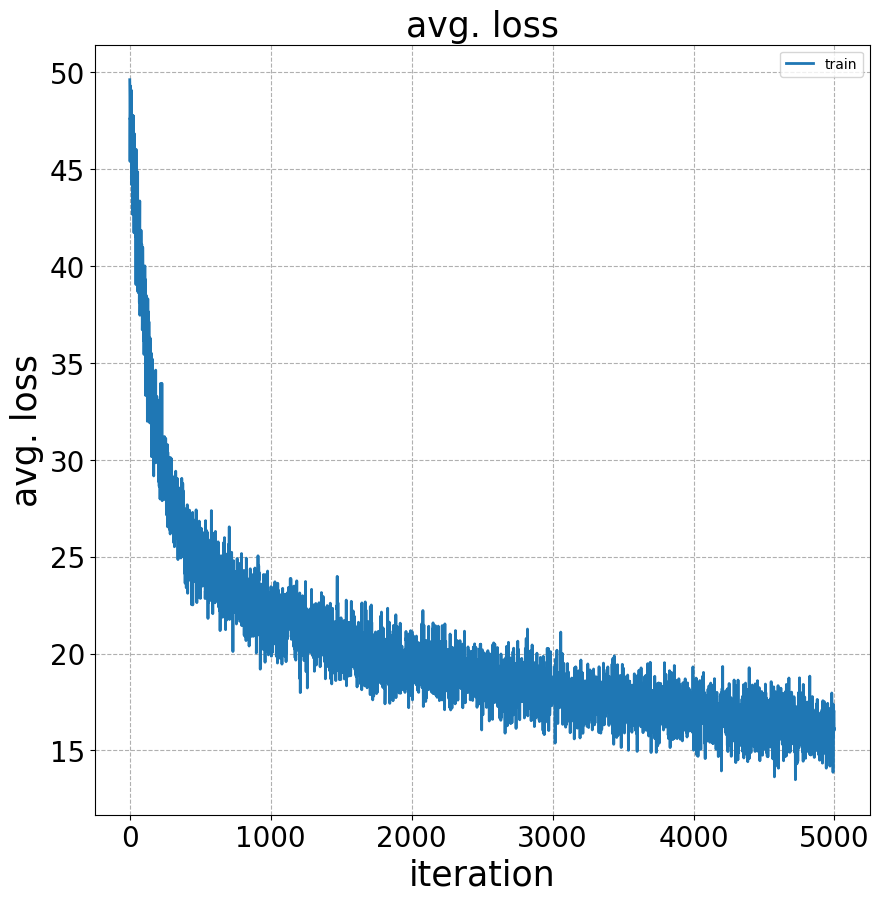

In [ ]:

dims_data = X_train.shape[1]
num_neurons_1st_layer = dims_data//2
num_neurons_output_layer = 10

num_iteration = 5000
learning_rate = 1e-3
batch_size = 256

# Initialize weight parameters randomly
# Initialize weight parameters randomly
W1 = np.random.randn(dims_data, num_neurons_1st_layer)
B1 = np.random.randn(num_neurons_1st_layer)
W2 = np.random.randn(num_neurons_1st_layer, num_neurons_output_layer)
B2 = np.random.randn(num_neurons_output_layer)

def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + np.exp(-x))

loss = np.zeros(num_iteration)

tic = time.time()

for itr in tqdm(range(num_iteration)):

    #take random samples
    ids_random_samples = np.random.choice(X_train.shape[0], batch_size)
    X_train_rand_sample = X_train[ids_random_samples, :]
    Y_train_rand_sample = Y_train[ids_random_samples]
    #-------------------------------

    f_1 = act_func_sigmoid(X_train_rand_sample.dot(W1) + B1)
    scores = f_1.dot(W2) + B2

    scores -= np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(scores)
    prob_scores = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    temp_loss = -np.sum(np.log(prob_scores[(range(Y_train_rand_sample.shape[0]), Y_train_rand_sample)]))
    temp_loss /= Y_train_rand_sample.shape[0]


    loss[itr] = temp_loss

    prob_scores[(range(Y_train_rand_sample.shape[0]), Y_train_rand_sample)] -= 1# (M, C)
    del_loss_by_del_W2 = f_1.T.dot(prob_scores)/Y_train_rand_sample.shape[0]#(H, C)
    del_loss_by_del_B2 = np.sum(prob_scores, axis=0)/Y_train_rand_sample.shape[0] #(C)
    del_loss_by_del_W1 = X_train_rand_sample.T.dot(prob_scores.dot(W2.T) * f_1 * (1 - f_1))/Y_train_rand_sample.shape[0]#(D,H)
    del_loss_by_del_B1 = np.sum(prob_scores.dot(W2.T) * f_1 * (1 - f_1), axis=0)/Y_train_rand_sample.shape[0]

    W1 -= learning_rate * del_loss_by_del_W1
    B1 -= learning_rate * del_loss_by_del_B1
    W2 -= learning_rate * del_loss_by_del_W2
    B2 -= learning_rate * del_loss_by_del_B2

toc = time.time()
tot_exe_numpy = toc - tic

# final loss based on all samples
f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
scores = f_1.dot(W2) + B2

scores -= np.max(scores, axis=1, keepdims=True)
exp_scores = np.exp(scores)
prob_scores = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
final_loss_sgd = -np.sum(np.log(prob_scores[(range(Y_train.shape[0]), Y_train)]))
final_loss_sgd /= Y_train.shape[0]
print('Time taken: {} and final loss: {}' .format(tot_exe_numpy, final_loss_sgd))

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')


In [ ]:
# calculate accuracy
f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
scores_train = f_1.dot(W2) + B2
Y_train_pred = np.argmax(scores_train, axis=1)
train_accuracy = np.mean(Y_train == Y_train_pred)

f_1 = act_func_sigmoid(X_test.dot(W1) + B1)
scores_test = f_1.dot(W2) + B2
Y_test_pred = np.argmax(scores_test, axis=1)
test_accuracy = np.mean(Y_test == Y_test_pred)
print('acc.: train-{} and test-{}' .format(train_accuracy, test_accuracy))

acc.: train-0.1896 and test-0.1788


# <font color='red'>Let's try with MNIST data</font>
# Read MNIST data:
There are many [way](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

In [37]:
def read_images(filename):
    """Read MNIST images"""

    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))

    return images

def read_labels(filename):
    """Read MNIST labels"""

    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)

    return labels


mnist_datapath = '/content/drive/MyDrive/Mnist/'


train_image_filename = ''.join([mnist_datapath, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([mnist_datapath, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([mnist_datapath, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([mnist_datapath, 't10k-labels-idx1-ubyte.gz'])

X_train = read_images(train_image_filename)
Y_train = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))

X_test = read_images(test_image_filename)
Y_test = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))

X_train = X_train.reshape(X_train.shape[0], -1).astype(float)/255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype(float)/255.0
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))




BadGzipFile: Not a gzipped file (b'\x00\x00')

# plot data freq. for each class

#images: 60000
Each image size: 28x28


/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


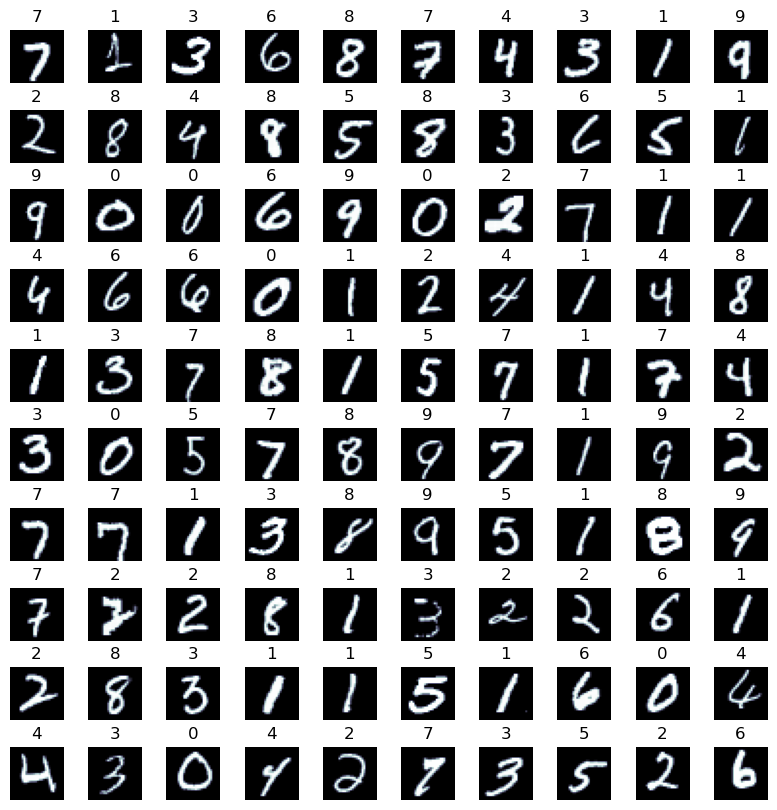

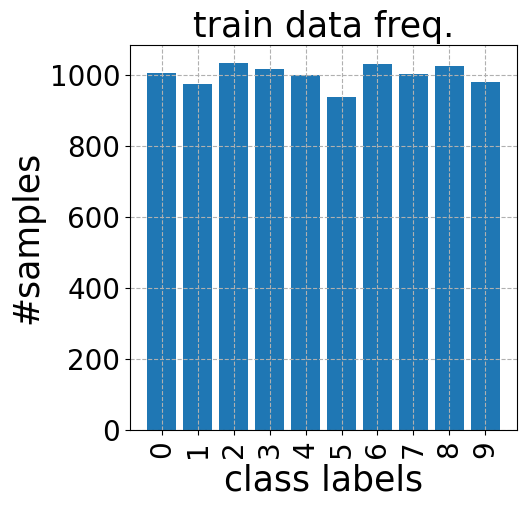

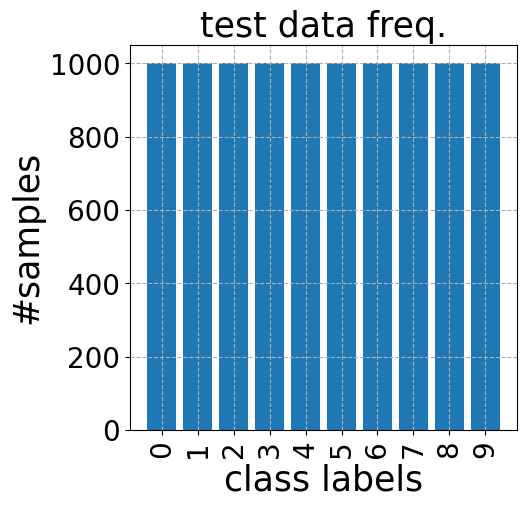

In [ ]:
num_images = X_train.shape[0]
r_image = int(np.sqrt(X_train.shape[1]))
c_image = int(np.sqrt(X_train.shape[1]))
print('#images: {}\nEach image size: {}x{}' .format(num_images, r_image, c_image))

num_rand_samples = 100
ids_rand_samples = np.random.randint(0, num_images, num_rand_samples)
images = [X_train[i,:].reshape( r_image, c_image) for i in ids_rand_samples]
labels = [Y_train[i] for i in ids_rand_samples]
subplot_images(images, labels, hspace=0.5)

# rand_ids = np.random.choice(X_train.shape[0])
# plt.imshow(X_train[rand_ids, :].reshape(int(np.sqrt(X_train.shape[1])), -1), cmap='gray')
# plt.title('class-'+str(Y_train[rand_ids]))
# plt.show()

# print('Train image {}-th sample ' .format(rand_ids))
# print(X_train[rand_ids, :])
# train_class_freq = np.histogram(Y_train, list(set(Y_train))+[10])
# test_class_freq = np.histogram(Y_test, list(set(Y_test))+[10])

plot_bars(list(set(Y_train)), train_class_freq[0], title='train data freq.')
plot_bars(list(set(Y_test)), test_class_freq[0], title='test data freq.')


100%|██████████| 10000/10000 [01:27<00:00, 114.86it/s]


Time taken: 87.0674979686737 and final loss: 3.093599618128757


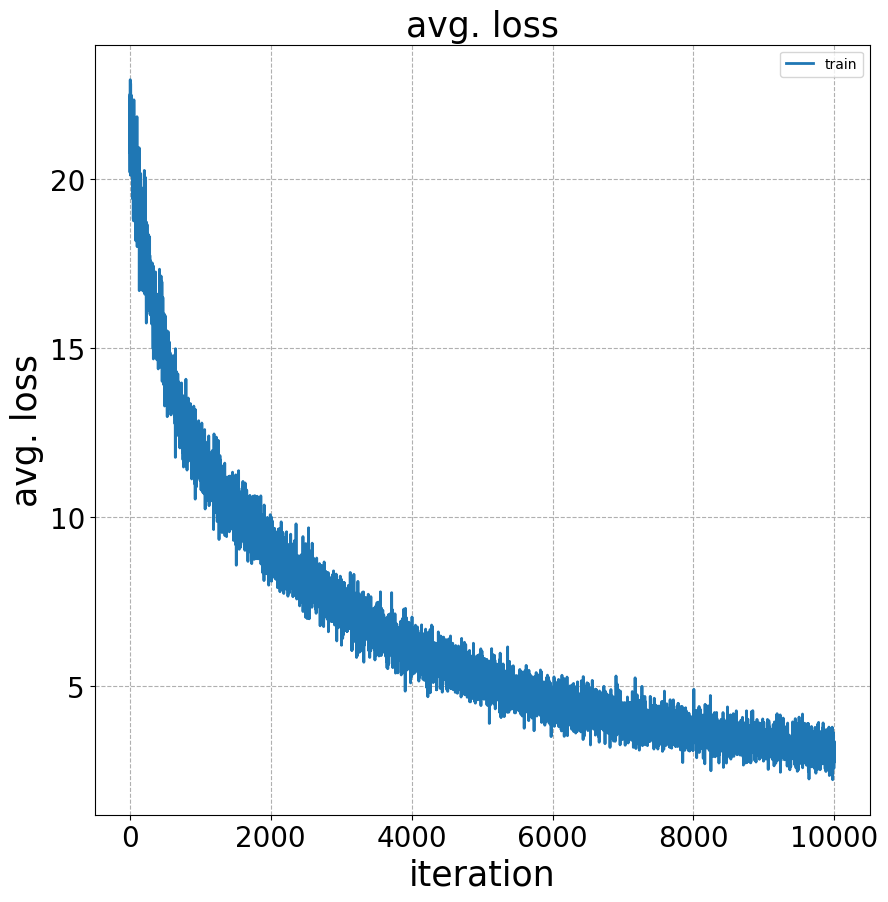

In [ ]:

dims_data = X_train.shape[1]
num_neurons_1st_layer = dims_data//2
num_neurons_output_layer = 10

num_iteration = 10000
learning_rate = 1e-3
batch_size = 256

# Initialize weight parameters randomly
# Initialize weight parameters randomly
W1 = np.random.randn(dims_data, num_neurons_1st_layer)
B1 = np.random.randn(num_neurons_1st_layer)
W2 = np.random.randn(num_neurons_1st_layer, num_neurons_output_layer)
B2 = np.random.randn(num_neurons_output_layer)

def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + np.exp(-x))

loss = np.zeros(num_iteration)

tic = time.time()

for itr in tqdm(range(num_iteration)):

    #take random samples
    ids_random_samples = np.random.choice(X_train.shape[0], batch_size)
    X_train_rand_sample = X_train[ids_random_samples, :]
    Y_train_rand_sample = Y_train[ids_random_samples]
    #-------------------------------

    f_1 = act_func_sigmoid(X_train_rand_sample.dot(W1) + B1)
    scores = f_1.dot(W2) + B2

    scores -= np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(scores)
    prob_scores = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    temp_loss = -np.sum(np.log(prob_scores[(range(Y_train_rand_sample.shape[0]), Y_train_rand_sample)]))
    temp_loss /= Y_train_rand_sample.shape[0]


    loss[itr] = temp_loss

    prob_scores[(range(Y_train_rand_sample.shape[0]), Y_train_rand_sample)] -= 1# (M, C)
    del_loss_by_del_W2 = f_1.T.dot(prob_scores)/Y_train_rand_sample.shape[0]#(H, C)
    del_loss_by_del_B2 = np.sum(prob_scores, axis=0)/Y_train_rand_sample.shape[0] #(C)
    del_loss_by_del_W1 = X_train_rand_sample.T.dot(prob_scores.dot(W2.T) * f_1 * (1 - f_1))/Y_train_rand_sample.shape[0]#(D,H)
    del_loss_by_del_B1 = np.sum(prob_scores.dot(W2.T) * f_1 * (1 - f_1), axis=0)/Y_train_rand_sample.shape[0]

    W1 -= learning_rate * del_loss_by_del_W1
    B1 -= learning_rate * del_loss_by_del_B1
    W2 -= learning_rate * del_loss_by_del_W2
    B2 -= learning_rate * del_loss_by_del_B2

toc = time.time()
tot_exe_numpy = toc - tic

# final loss based on all samples
f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
scores = f_1.dot(W2) + B2

scores -= np.max(scores, axis=1, keepdims=True)
exp_scores = np.exp(scores)
prob_scores = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
final_loss_sgd = -np.sum(np.log(prob_scores[(range(Y_train.shape[0]), Y_train)]))
final_loss_sgd /= Y_train.shape[0]
print('Time taken: {} and final loss: {}' .format(tot_exe_numpy, final_loss_sgd))

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')


In [ ]:
# calculate accuracy
f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
scores_train = f_1.dot(W2) + B2
Y_train_pred = np.argmax(scores_train, axis=1)
train_accuracy = np.mean(Y_train == Y_train_pred)

f_1 = act_func_sigmoid(X_test.dot(W1) + B1)
scores_test = f_1.dot(W2) + B2
Y_test_pred = np.argmax(scores_test, axis=1)
test_accuracy = np.mean(Y_test == Y_test_pred)
print('acc.: train-{} and test-{}' .format(train_accuracy, test_accuracy))

acc.: train-0.5344666666666666 and test-0.5461


# Now let's see how <font color='red'>data normalization</font> effect the soln

In [ ]:
# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_test -= mean_image


100%|██████████| 10000/10000 [01:24<00:00, 118.73it/s]


Time taken: 84.22690606117249 and final loss: 3.390433149877529


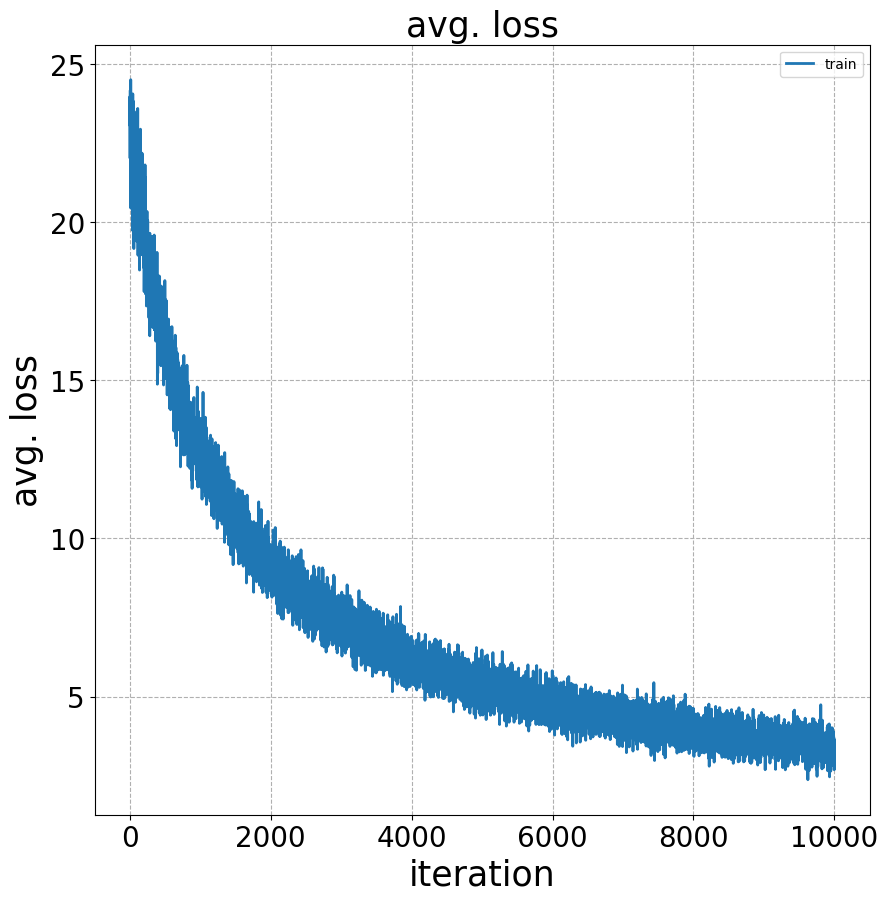

In [ ]:

dims_data = X_train.shape[1]
num_neurons_1st_layer = dims_data//2
num_neurons_output_layer = 10

num_iteration = 10000
learning_rate = 1e-3
batch_size = 256

# Initialize weight parameters randomly
# Initialize weight parameters randomly
W1 = np.random.randn(dims_data, num_neurons_1st_layer)
B1 = np.random.randn(num_neurons_1st_layer)
W2 = np.random.randn(num_neurons_1st_layer, num_neurons_output_layer)
B2 = np.random.randn(num_neurons_output_layer)

def act_func_sigmoid(x):
    """Sigmoid activation function"""

    return 1./(1 + np.exp(-x))

loss = np.zeros(num_iteration)

tic = time.time()

for itr in tqdm(range(num_iteration)):

    #take random samples
    ids_random_samples = np.random.choice(X_train.shape[0], batch_size)
    X_train_rand_sample = X_train[ids_random_samples, :]
    Y_train_rand_sample = Y_train[ids_random_samples]
    #-------------------------------

    f_1 = act_func_sigmoid(X_train_rand_sample.dot(W1) + B1)
    scores = f_1.dot(W2) + B2

    scores -= np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(scores)
    prob_scores = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    temp_loss = -np.sum(np.log(prob_scores[(range(Y_train_rand_sample.shape[0]), Y_train_rand_sample)]))
    temp_loss /= Y_train_rand_sample.shape[0]


    loss[itr] = temp_loss

    prob_scores[(range(Y_train_rand_sample.shape[0]), Y_train_rand_sample)] -= 1# (M, C)
    del_loss_by_del_W2 = f_1.T.dot(prob_scores)/Y_train_rand_sample.shape[0]#(H, C)
    del_loss_by_del_B2 = np.sum(prob_scores, axis=0)/Y_train_rand_sample.shape[0] #(C)
    del_loss_by_del_W1 = X_train_rand_sample.T.dot(prob_scores.dot(W2.T) * f_1 * (1 - f_1))/Y_train_rand_sample.shape[0]#(D,H)
    del_loss_by_del_B1 = np.sum(prob_scores.dot(W2.T) * f_1 * (1 - f_1), axis=0)/Y_train_rand_sample.shape[0]

    W1 -= learning_rate * del_loss_by_del_W1
    B1 -= learning_rate * del_loss_by_del_B1
    W2 -= learning_rate * del_loss_by_del_W2
    B2 -= learning_rate * del_loss_by_del_B2

toc = time.time()
tot_exe_numpy = toc - tic

# final loss based on all samples
f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
scores = f_1.dot(W2) + B2

scores -= np.max(scores, axis=1, keepdims=True)
exp_scores = np.exp(scores)
prob_scores = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
final_loss_sgd = -np.sum(np.log(prob_scores[(range(Y_train.shape[0]), Y_train)]))
final_loss_sgd /= Y_train.shape[0]
print('Time taken: {} and final loss: {}' .format(tot_exe_numpy, final_loss_sgd))

plot_losses([loss], labels=['train'], xlabel_='iteration', pos_legend='upper right')


In [ ]:
# calculate accuracy
f_1 = act_func_sigmoid(X_train.dot(W1) + B1)
scores_train = f_1.dot(W2) + B2
Y_train_pred = np.argmax(scores_train, axis=1)
train_accuracy = np.mean(Y_train == Y_train_pred)

f_1 = act_func_sigmoid(X_test.dot(W1) + B1)
scores_test = f_1.dot(W2) + B2
Y_test_pred = np.argmax(scores_test, axis=1)
test_accuracy = np.mean(Y_test == Y_test_pred)
print('acc.: train-{} and test-{}' .format(train_accuracy, test_accuracy))

# confusion matrix
conf_mat_train = np.zeros((train_class_freq[0].shape[0], train_class_freq[0].shape[0]))
for i in range(len(Y_test_pred)):
    conf_mat_train[Y_test[i], Y_test_pred[i]] += 1
conf_mat_train /= conf_mat_train.sum(axis=1, keepdims=True)
conf_mat_train *= 100
print(conf_mat_train)



acc.: train-0.5592333333333334 and test-0.5739
[[69.69387755  0.          5.10204082  4.18367347  0.81632653 10.20408163
   6.93877551  1.2244898   1.12244898  0.71428571]
 [ 0.26431718 85.37444934  2.73127753  0.17621145  0.969163    2.73127753
   2.64317181  0.70484581  4.31718062  0.08810573]
 [ 4.45736434  2.81007752 60.27131783  6.20155039  4.84496124  2.3255814
   5.62015504  4.06976744  6.97674419  2.42248062]
 [ 4.95049505  2.07920792  5.94059406 52.77227723  3.46534653 12.57425743
   1.68316832  3.26732673 10.1980198   3.06930693]
 [ 3.76782077  2.24032587  3.15682281  1.01832994 46.6395112   2.64765784
   5.70264766  8.04480652  4.9898167  21.79226069]
 [ 6.16591928  1.34529148  3.81165919 20.96412556  8.632287   32.51121076
   7.06278027  3.25112108  4.48430493 11.77130045]
 [ 4.90605428  0.9394572   7.72442589  1.87891441 10.75156576  7.93319415
  59.70772443  0.9394572   3.54906054  1.67014614]
 [ 3.79377432  4.96108949  4.08560311  2.72373541  3.69649805  1.45914397
   1.